In [63]:
from importlib import reload
import minigraphs.miniaturize as mini
import networkx as nx
import matplotlib.pyplot as plt

reload(mini)

<module 'minigraphs.miniaturize' from '/mnt/ufs18/home-245/martjor/repos/dev_pt/src/minigraphs/miniaturize.py'>

In [36]:
metrics_funcs = {
    'density': mini.NX_DENSITY,
    'clustering': mini.NX_AVERAGE_CLUSTERING,
    'assortativity': mini.NX_DEGREE_ASSORTATIVITY
}

n_steps = 100
beta = 100
schedule = mini.schedule_sigmoid(n_steps,beta)

annealer = mini.MH(metrics_funcs,schedule=schedule,n_changes=1)

In [37]:
G = nx.erdos_renyi_graph(100,0.5)
metrics = {
    'density': 0.3,
    'clustering': 0.5,
    'assortativity': 0.1
}

annealer.transform(G,metrics,n_iterations=n_steps)
trajectories = annealer.trajectories_

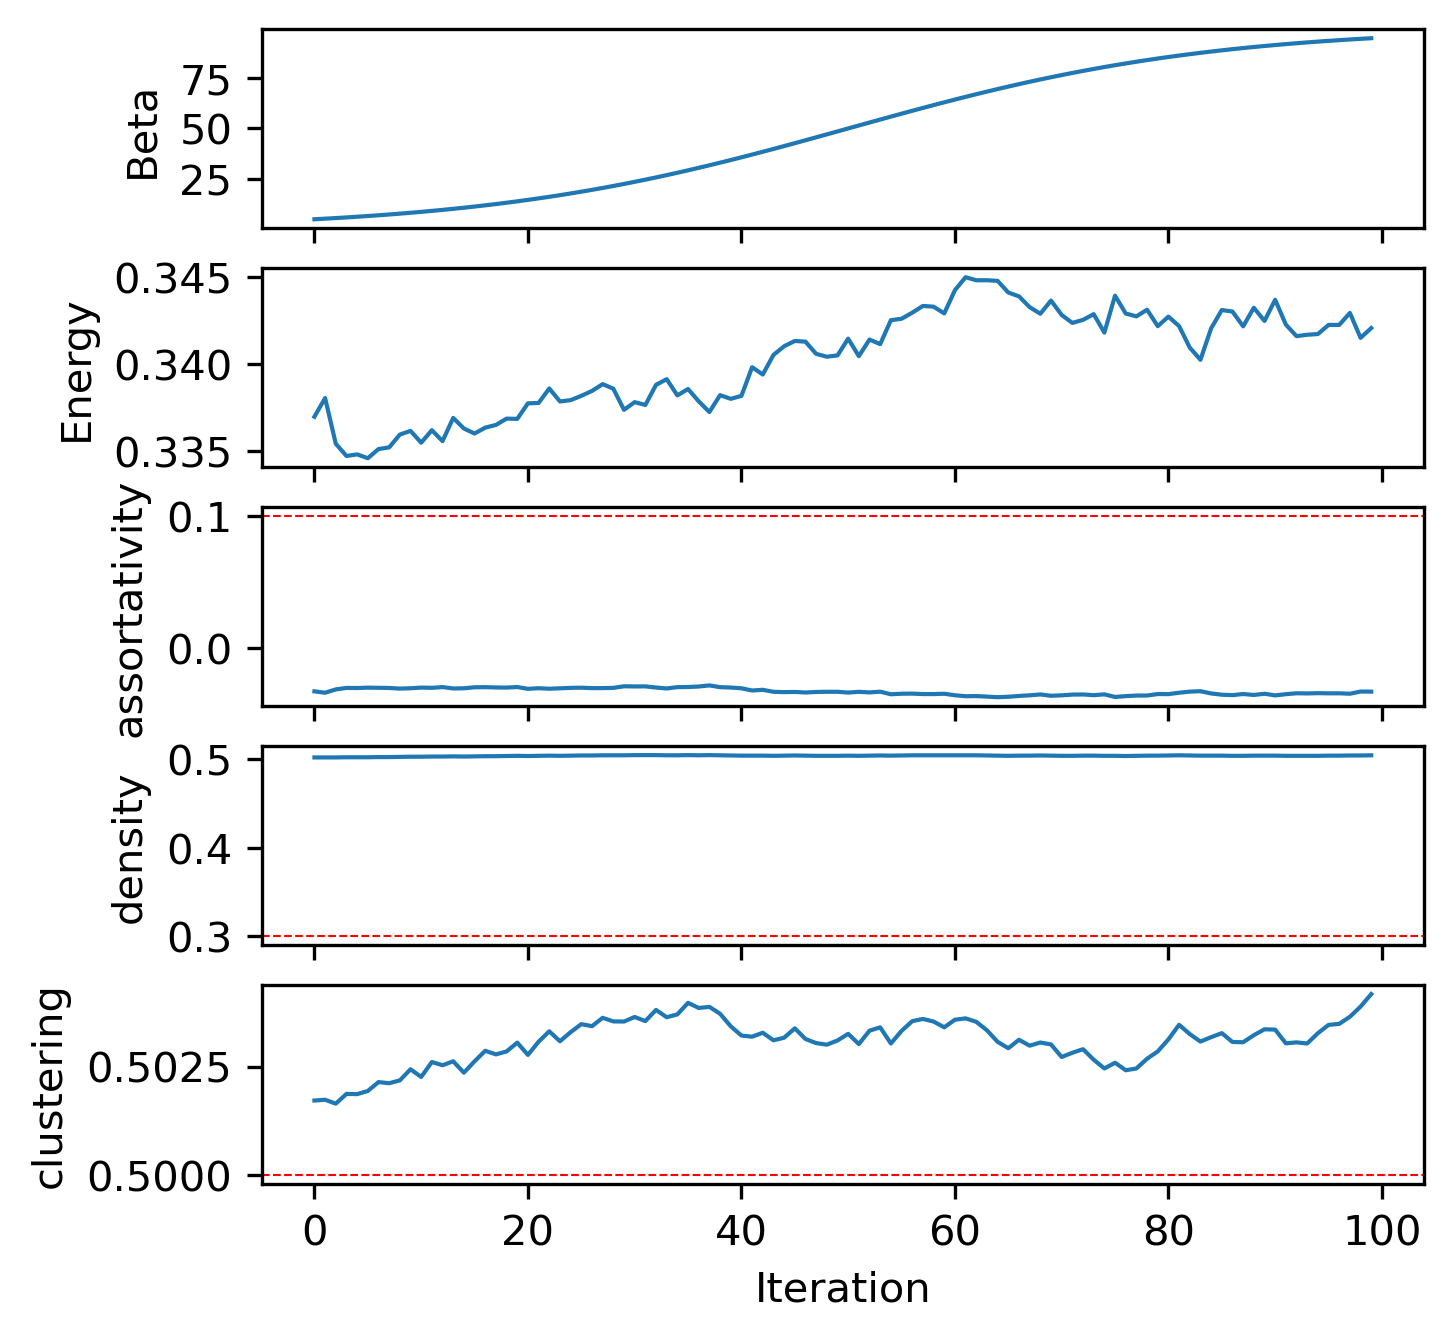

In [21]:
mini.MH.plot_trajectories(trajectories,metrics)

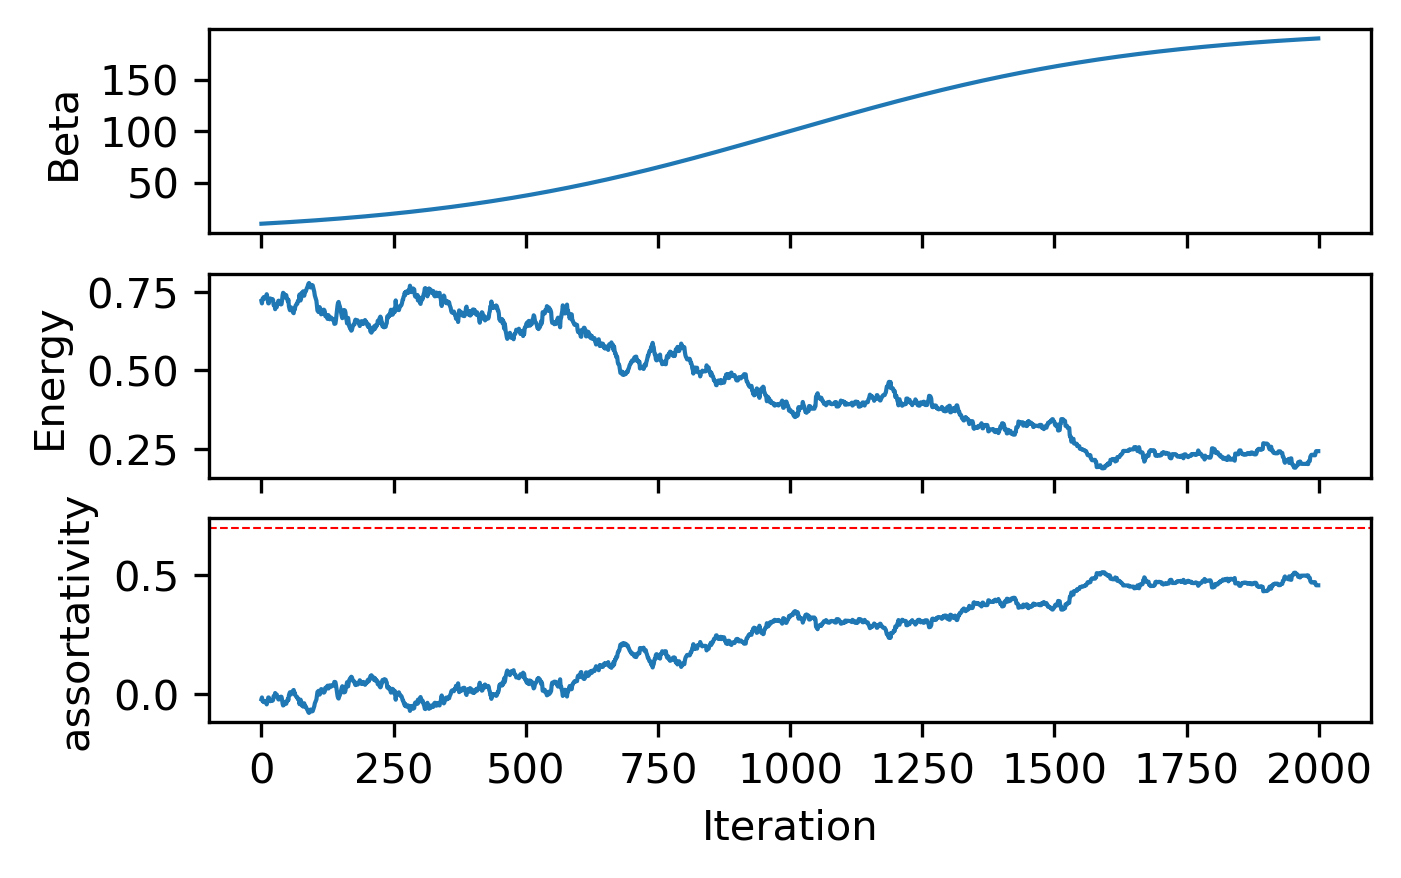

In [42]:
n_steps = 2000
beta = 200

# Logistic schedule
schedule = mini.schedule_sigmoid(n_steps,beta)
annealer = mini.MH(metrics_funcs,schedule=schedule,n_changes=1)

G = nx.erdos_renyi_graph(100,0.05)
metrics = {
    'assortativity': 0.7
}

annealer.transform(G,metrics,n_iterations=n_steps)
mini.MH.plot_trajectories(annealer.trajectories_,metrics)



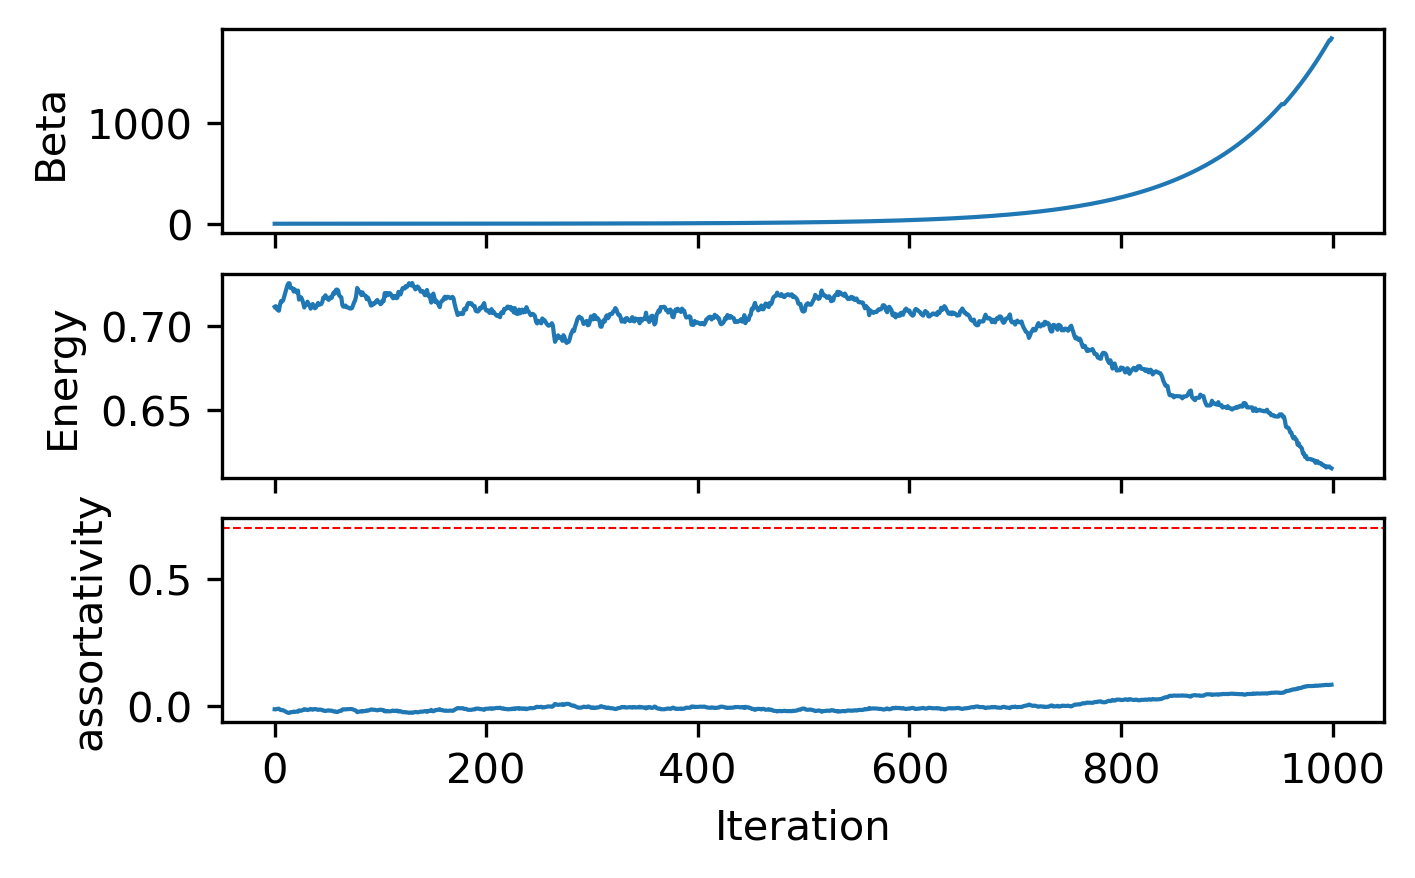

In [66]:
reload(mini)
metrics_funcs = {
    'density': mini.NX_DENSITY,
    'clustering': mini.NX_AVERAGE_CLUSTERING,
    'assortativity': mini.NX_DEGREE_ASSORTATIVITY
}

metrics = {
    'assortativity': 0.7
}

G = nx.erdos_renyi_graph(100,0.3)
annealer = mini.MH(metrics_funcs)
annealer.transform(G,metrics,n_iterations=1000,beta=0.1,n_changes)
mini.MH.plot_trajectories(annealer.trajectories_,metrics)